In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print("Entries in training data:")
print(df.shape[0])
print(df.head())

C:\Users\noah1\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Entries in training data:
70692
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0  

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


x = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

input_shape = [x_train.shape[1]]

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy']) 

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   batch_size=64,
                   epochs=100,
                   callbacks=[es_callback])

Epoch 1/100
884/884 [==============================] - 6s 4ms/step - loss: 0.5643 - accuracy: 0.7157 - val_loss: 0.5223 - val_accuracy: 0.7409
Epoch 2/100
884/884 [==============================] - 3s 4ms/step - loss: 0.5153 - accuracy: 0.7449 - val_loss: 0.5133 - val_accuracy: 0.7478
Epoch 3/100
884/884 [==============================] - 4s 4ms/step - loss: 0.5096 - accuracy: 0.7489 - val_loss: 0.5105 - val_accuracy: 0.7469
Epoch 4/100
884/884 [==============================] - 3s 4ms/step - loss: 0.5070 - accuracy: 0.7504 - val_loss: 0.5092 - val_accuracy: 0.7475
Epoch 5/100
884/884 [==============================] - 3s 4ms/step - loss: 0.5054 - accuracy: 0.7511 - val_loss: 0.5082 - val_accuracy: 0.7476
Epoch 6/100
884/884 [==============================] - 4s 4ms/step - loss: 0.5042 - accuracy: 0.7518 - val_loss: 0.5076 - val_accuracy: 0.7479
Epoch 7/100
884/884 [==============================] - 3s 4ms/step - loss: 0.5032 - accuracy: 0.7519 - val_loss: 0.5071 - val_accuracy: 0.7481

In [5]:
pca = PCA(n_components=0.85)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

input_shape = [x_train_pca.shape[1]]

model_pca = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid')
])

model_pca.summary()

model_pca.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy']) 

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_pca.fit(x_train_pca, y_train,
                   validation_data=(x_test_pca, y_test),
                   batch_size=64,
                   epochs=100,
                   callbacks=[es_callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26,049
Trainable params: 26,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
884/884 [==============================] - 5s 4ms/step - loss: 0.5571 - accuracy: 0.7221 - val_loss: 0.5262 - val_accuracy: 0.7403
Epoch 2/100
884/884 [==================

442/442 [==============================] - 1s 2ms/step
Model Accuracy:  0.7507603083669283
Model Accuracy (w/ pca):  0.7457387368272155


Text(69.0, 0.5, 'True')

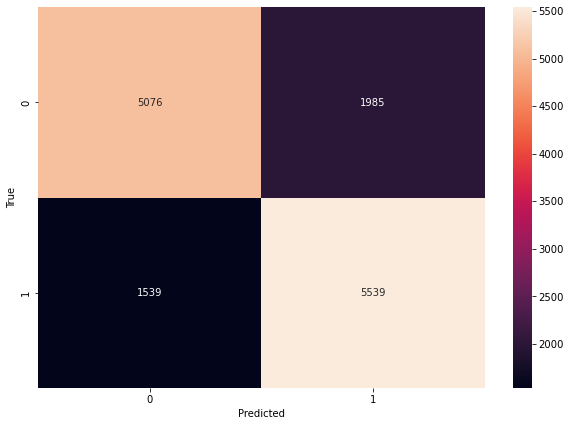

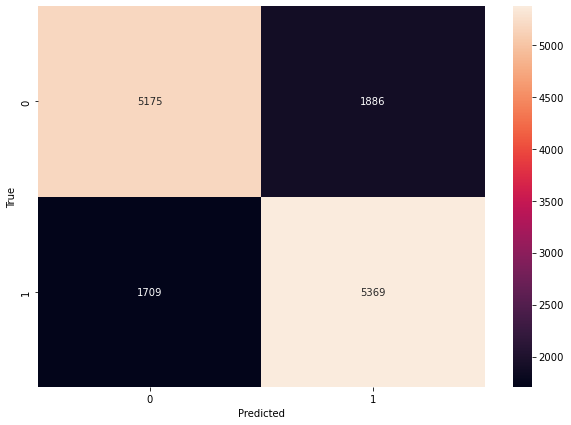

In [6]:
from sklearn.metrics import confusion_matrix
import sklearn
import  seaborn as sn
import matplotlib.pyplot as plt

pred = np.around(model.predict(x_test))
pred_pca = np.around(model_pca.predict(x_test_pca))

print('Model Accuracy: ', sklearn.metrics.accuracy_score(pred, y_test))
print('Model Accuracy (w/ pca): ', sklearn.metrics.accuracy_score(pred_pca, y_test))

cm = confusion_matrix(y_test, pred)
cm_pca = confusion_matrix(y_test, pred_pca)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.figure(figsize=(10,7))
sn.heatmap(cm_pca,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')